# 데이터 시각화 배워보기

이전 장에서는 데이터를 분석하는 법에 대해 배웠으며, 이번 장에서는 데이터 및 분석된 자료를 시각화 하는법에 대해 배워보겠다. 데이터를 글자나 표가 아닌 그림으로 나타낼 경우 훨씬 직관적으로 이해가 가능하다. 파이썬에서는 데이터 시각화에 matplotlib 혹은 pandas 패키지를 사용하며, 고급 시각화에는 seaborn 패키지를 사용한다.

## 그래프의 구성요소

그래프를 그리기에 앞서, 그래프는 어떠한 요소들로 이루어져있는지 알아보도록 하자.

```{figure} image/plot/matplotlib.png
---
scale: 70%
name: matplotlib
---
그래프 구성요소 (출처: https://matplotlib.org)
```

- Figure: 그림 전체
- Axes: 그림 내부의 좌표축을 의미하며, 개별 그림을 의미
- Line: 선 그래프에서 선
- Markers: 점 그래프에서 마커
- Legend: 범례
- Title: 제목
- Grid: 격자
- Spines: 윤곽선
- X axis label: x축 레이블
- Y axis label: y축 레이블
- Major tick: 메인 눈금
- Major tick label: 메인 눈금 레이블
- Minor tick: 서브 눈금
- Minor tick label: 서브 눈금 레이블

패키지의 함수들을 이용해 각각의 요소를 섬세하게 꾸밀수도 있다. 또한 하나의 figure 내에는 여러 개의 axes가 그려질 수도 있다.

```{figure} image/plot/figure_axes.png
---
name: figure_axes
---
다중 axes
```

## matplotlib 패키지를 이용한 시각화

matplotlib 패키지는 파이썬 표준 시각화 도구라도 불릴 정도로 널리 활용되고 있다. 그래프 요소를 세세하게 꾸밀 수 있을 뿐만 아니라 배우는것도 그리 어렵지 않다. 먼저 해당 패키지의 기본적인 사용법에 대해 알아보도록 하자.

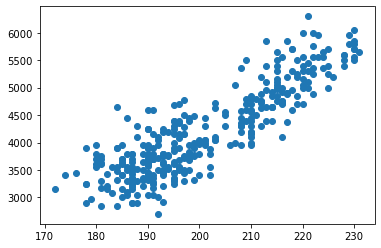

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('penguins')

plt.scatter(df['flipper_length_mm'], df['body_mass_g'])
plt.show()

1. matplotlib 패키지 중에서 pyplot 모듈을 plt로 불러온다.
2. 팔머 펭귄 데이터셋(penguins)을 불러온다.
3. 산점도를 나타내는 `scatter()` 함수 내에 $x$축과 $y$축 정보를 입력한다.
4. `plt.show()`를 통해 그래프를 출력한다.

매우 쉽게 그래프를 그릴 수 있으며, 결과를 통해 날개의 길이와 뭄무게가 비례한다는 것을 직관적으로 확인할 수 있다.

다른 종류의 그래프 역시 쉽게 표현할 수 있다. 이번에는 각 펭귄의 종 별 몸무게의 차이를 그래프로 나타내보자.

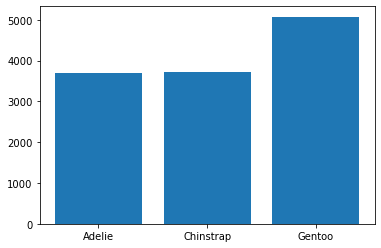

In [2]:
df_group = df.groupby('species')['body_mass_g'].mean().reset_index()
plt.bar(x=df_group['species'], height=df_group['body_mass_g'])
plt.show()

1. 'species' 별로 그룹을 묶은 후, 'body_mass_g' 열의 평균을 구한다. 그 후 `reset_index()` 메서드를 통해 데이터프레임 형태로 나타낸다.
2. 막대그래프를 나타내는 `bar()` 함수 내에 $x$축과 높이 정보(height)를 입력한다.
3. `plt.show()`를 통해 그래프를 출력한다.

결과를 통해 Gentoo 종의 몸무게가 다른 종에 비해 많이 나간다는 점을 알 수 있다. 이번에는 몸무게의 분포를 히스토그램으로 나타내보자.

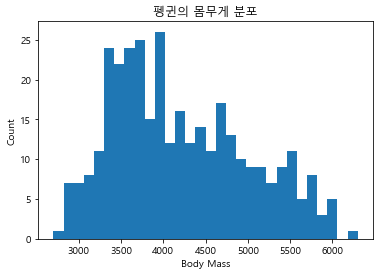

In [3]:
plt.rc('font', family='Malgun Gothic')
plt.hist(df['body_mass_g'], bins=30)
plt.xlabel('Body Mass')
plt.ylabel('Count')
plt.title('펭귄의 몸무게 분포')
plt.show()

1. Matplotlib은 한글 폰트를 지원하지 않아 한글이 깨지는 현상이 발생하므로, 한글을 나타낼 수 있는 'Malgun Gothic'으로 폰트를 지정한다.
2. 히스토그램을 나타내는 `hist()` 함수 내에 나타내고자 하는 열을 입력한다. `bins` 인자에는 히스토그램을 몇개의 구간으로 나눌지를 입력한다.
3. $x$축과 $y$축 레이블, 제목에 원하는 글자를 입력한다.
4. `plt.show()`를 통해 그래프를 출력한다.

펭귄의 몸무게 분포를 히스토그램 형태로 표현할 수 있다. 이번에는 선 그래프를 나타내보도록 하자.

In [4]:
import pandas as pd

df_unrate = pd.read_csv(
    'https://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
)
df_unrate.head()

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


먼저 `read_csv()` 함수를 통해 세인트루이스 연방준비위원회에서 제공하는 미국 실업자 데이터를 받아온다.

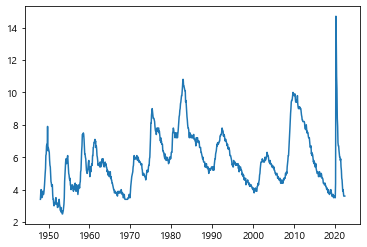

In [5]:
df_unrate['DATE'] = pd.to_datetime(df_unrate['DATE'])

plt.plot(df_unrate['DATE'], df_unrate['VALUE'])
plt.show()

1. 'DATE' 열을  datetime 객체로 변환한다.
2. `plot()` 함수는 선 그래프를 나타내며, $x$축과 $y$축 정보를 각각 입력한다.
3. `plt.show()`를 통해 그래프를 출력한다.

코로나 이후 실업률이 급증했음을 확인할 수 있다.

### 한 번에 여러개의 그래프 나타내기

하나의 figure 내에는 여러 개의 axes를 그릴수도 있다. 이를 실행하는 코드는 책이나 설명하는 사람 마다 약간씩 다르며, 그 이유에 대해 간략하게 설명하겠다. matplotlib 패키지는 크게 두 가지 방법으로 사용할 수 있다.

- stateless API (objected-based): 내가 지정한 figure, 내가 지정한 axes에 그림을 그리는 방법
- stateful API (state-based): 현재의 figure, 현재의 axes에 그림을 그리는 방법

stateless 방법은 figure와 axes를 직접 만들어야 하고, 이는 객체지향적 특징을 가지고 있다고 볼 수 있다. 반면 stateful 방법은 현재의 figure와 axes를 자동으로 찾아 그곳에 그래프를 나타내는 방식이다. 처음에는 stateless 방법만 존재했으나 더 편리한 사용을 위해 wrapper 모듈인 pyplot이 개발되었고 이를 통해 stateful 방법을 사용할 수 있다. 그래프를 간단하게 표현할 때는 stateful 방법으로도 충분하지만, 보다 정교한 작업을 할 때는 stateless 방법을 사용해야 한다. 

먼저 stateless 방법을 사용해 그래프를 나타내보도록 하자.

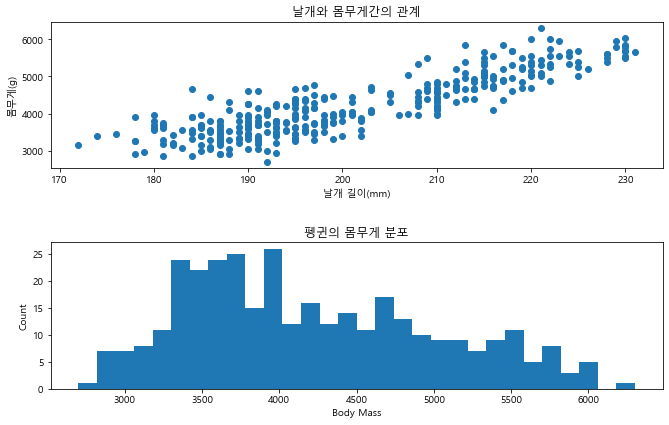

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# 첫번째 그림
axes[0].scatter(df['flipper_length_mm'], df['body_mass_g'])
axes[0].set_xlabel('날개 길이(mm)')
axes[0].set_ylabel('몸무게(g)')
axes[0].set_title('날개와 몸무게간의 관계')

# 두번째 그림
axes[1].hist(df['body_mass_g'], bins=30)
axes[1].set_xlabel('Body Mass')
axes[1].set_ylabel('Count')
axes[1].set_title('펭귄의 몸무게 분포')

# 간격 조정
plt.subplots_adjust(left=0.1,
                    right=0.95,
                    bottom=0.1,
                    top=0.95,
                    wspace=0.5,
                    hspace=0.5)

plt.show()

1. `plt.subplots(2, 1)`을 통해 figure 내에 2행 1열로 2개의 axes 객체를 만든다. 또한 `figsize=(10, 6)`을 통해 figure의 가로 세로 길이는 각각 10과 6으로 정한다.
2. `axes[0]` 즉 첫번째 axes에 `scatter()` 함수를 통해 산점도를 그린다. 그 후 `set_xlabel()`, `set_ylabel()`, `set_title()` 함수를 통해 해당 axes의 x 레이블, y 레이블, 제목을 추가한다.
3. `axes[1]` 즉 두번째 axes에도 `hist()` 함수를 통한 그래프 그리기 및 기타 요소를 추가한다.
4. 두 그림이 겹쳐 보이므로 `subplots_adjust()` 함수를 통해 여백을 조정한다.
5. `plt.show()`를 통해 그래프를 출력한다.

하나의 그림(figure) 내에 두개의 그래프(axes)가 동시에 출력되었다. 즉 stateless 방법은 figure 내에 원하는 만큼 axes 객체를 나눈 후, axes를 지정하여 그래프를 표현하였다. 이번에는 stateful 방법을 사용해 그래프를 나타내보도록 하자.

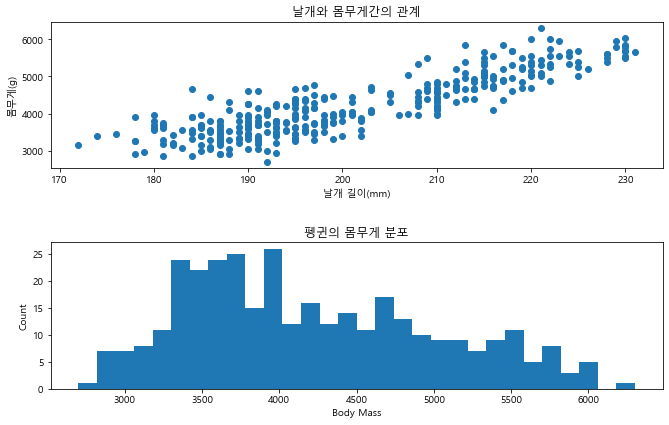

In [7]:
plt.figure(figsize=(10, 6))

# 첫번째 그림
plt.subplot(2, 1, 1)
plt.scatter(df['flipper_length_mm'], df['body_mass_g'])
plt.xlabel('날개 길이(mm)')
plt.ylabel('몸무게(g)')
plt.title('날개와 몸무게간의 관계')

# 두번째 그림
plt.subplot(2, 1, 2)
plt.hist(df['body_mass_g'], bins=30)
plt.xlabel('Body Mass')
plt.ylabel('Count')
plt.title('펭귄의 몸무게 분포')

# 간격 조정
plt.subplots_adjust(left=0.1,
                    right=0.95,
                    bottom=0.1,
                    top=0.95,
                    wspace=0.5,
                    hspace=0.5)

plt.show()

1. `plt.figure(figsize=(10, 6))`를 통해 figure를 만든다.
2. `plt.subplot(2,1,1)`를 입력하면 figure 내에 2행 1열의 axes를 만들며, 그 중 첫번째 axes를 현재 axes로 설정한다.
3. 해당 axes에 그래프가 표현된다.
4. `plt.subplot(2,1,2)`를 입력하면 두번째 axes를 현재 axes로 설정한다. 이후 해당 axes에 그래프가 표현된다.
5.  여백을 조정한 후 그래프를 출력한다.

이처럼 stateful 방식은 `subplot()`을 통해 현재 axes를 설정하면 해당 부분에 그림을 그리게 된다.

이 외에도 matplotlib 패키지를 이용하여 표현할 수 있는 그래프 및 방법은 아래 사이트에 자세히 나와있다.

```
https://matplotlib.org/
```

## pandas 패키지를 이용한 시각화

pandas 패키지는 matplotlib 패키지의 기능을 일부 내장하고 있어 시리즈 또는 데이터프레임 객체를 바로 그래프로 표현할 수 있으며, 그래프 종류는 다음과 같다.

- line: 선 그래프
- bar: 수직 막대 그래프
- barh: 수평 막대 그래프
- hist: 히스토그램
- box: 박스 플롯
- kde: 커널 밀도 그래프
- area: 면적 그래프
- pie: 파이 그래프
- scatter: 산점도 그래프
- hexbin: 고밀도 산점도 그래프

먼저 예제로 사용할 다이아몬드 데이터셋을 불러오도록 하자.

In [8]:
import seaborn as sns

df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


데이터의 각 변수는 다음과 같다.

- carat: 다이아몬드 무게
- cut: 컷팅의 가치
- color: 다이아몬드 색상
- clarity: 깨끗한 정도
- depth: 깊이 비율, z / mean(x, y)
- table: 가장 넓은 부분의 너비 대비 다이아몬드 꼭대기의 너비
- price: 가격
- x: 길이
- y: 너비
- z: 깊이

먼저 carat과 price의 관계를 살펴보자.

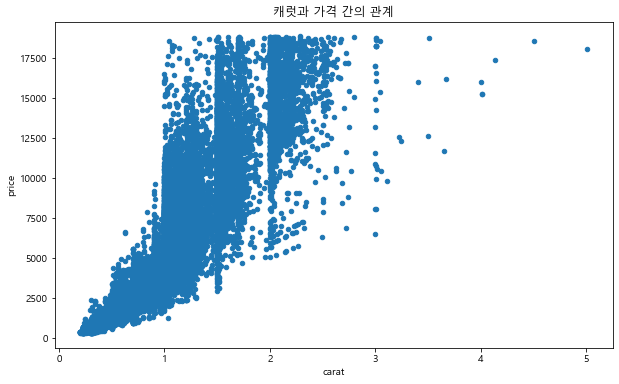

In [9]:
plt.rc('font', family='Malgun Gothic')
df.plot.scatter(x='carat', y='price', figsize=(10, 6), title='캐럿과 가격 간의 관계')
plt.show()

데이터프레임에 `plot()` 메서드를 입력하고, 그 후 산점도에 해당하는 `scatter()`를 추가로 입력한다. $x$축과 $y$축 정보를 입력하고 figure 사이즈 및 제목을 입력하면 이에 해당하는 그래프가 출력된다. 이번에는 추가로 cut 별로 색을 다르게 표현해보도록 하자.

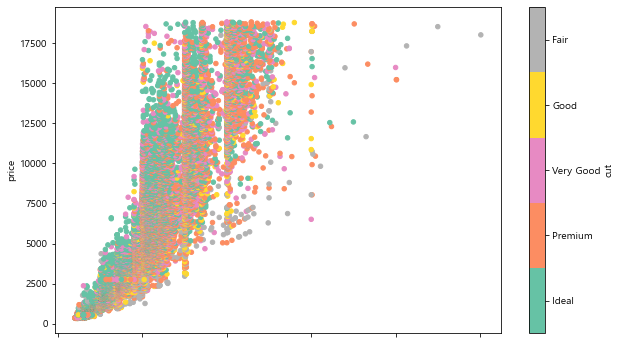

In [10]:
df.plot.scatter(x='carat', y='price', c='cut', cmap='Set2', figsize=(10, 6))
plt.show()

c 인자에 색을 구분하고 싶은 열을 입력하며, cmap에는 파레트를 지정한다. 결과를 확인해보면 cut 별로 색이 다르게 표현되었다.

이번에는 price 열의 데이터를 히스토그램으로 표현해보도록 하자.

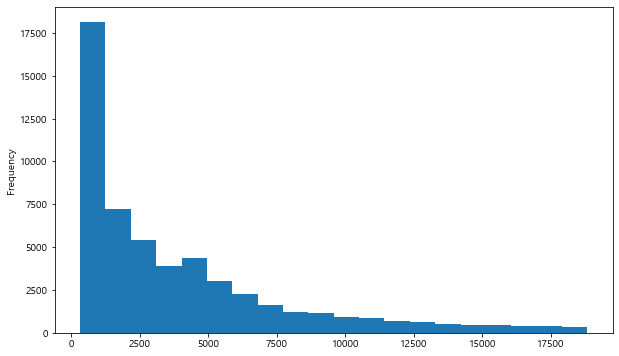

In [11]:
df['price'].plot.hist(figsize=(10, 6), bins=20)
plt.show()

히스토그램으로 표현하고 싶은 열만 선택한 후, `plot.hist()` 메서드를 적용하면 히스토그램이 표현된다. matplotlib 패키지를 사용했을 때와 동일하게 bins 인자를 통해 몇개의 구간으로 나눌지도 선택할 수 있다.

이번에는 데이터 분석과 시각화를 동시에 진행해보도록 하자. color에 따른 carat의 평균을 막대 그래프로 나타내보도록 하겠다.

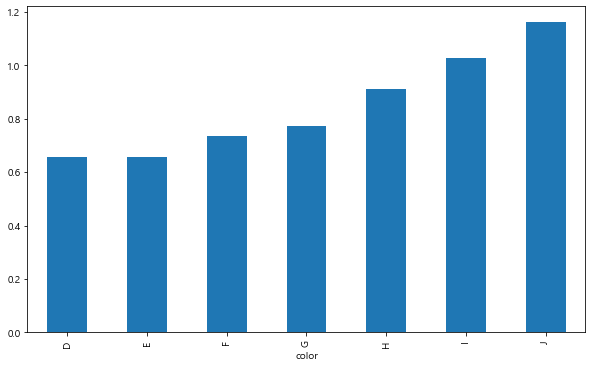

In [12]:
df.groupby('color')['carat'].mean().plot.bar(figsize=(10, 6))
plt.show()

1. 'color' 별로 그룹을 묶은 후 'carat'의 평균을 구한다.
2. 구해진 값에 바로 `plot.bar()` 메서드를 적용해 막대 그래프로 표현한다.

이처럼 pandas 패키지를 사용하면 데이터 분석 및 시각화를 한 줄의 코드로 작성할 수 있다.

## seaborn 패키지를 이용한 시각화

seaborn 패키지는 matplotlib 패키지 보다 좀 더 화려하고 복잡한 그래프를 표현할 수 있다. 이번에는 예제로써 타이타닉 데이터셋을 이용한다.

In [13]:
import seaborn as sns

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


먼저 나이와 운임의 관계를 살펴보도록 하자.

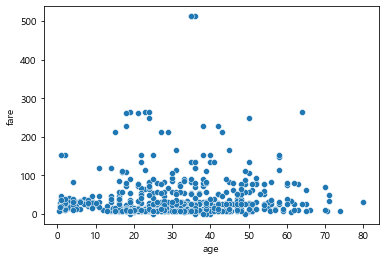

In [14]:
sns.scatterplot(data=df, x='age', y='fare')
plt.show()

`scatterplot()` 함수를 통해 산점도를 그릴 수 있다. data에는 사용하고자 하는 데이터를, x와 y에는 각각의 축 정보를 입력한다. 이번에는 각 그룹 별로 점의 색과 모양을 다르게 표현해보도록 하자.

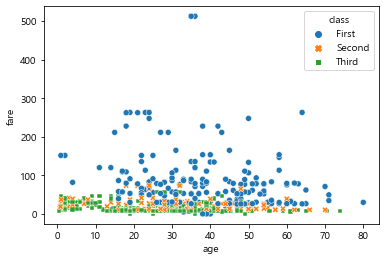

In [15]:
sns.scatterplot(data=df, x='age', y='fare', hue='class', style='class')
plt.show()

hue는 그룹 별 색을, style은 그룹 별 모양을 의미한다. class 별로 점의 색과 모양이 다르며, 'First' 클래스의 운임이 타 클래스 대비 훨씬 높음을 알 수 있다.

matplotlib이나 pandas로 표현하기 어려운 히트맵과 같은 복잡한 그림도 seaborn 패키지를 이용하면 매우 쉽게 나타낼 수 있다. 먼저 각 클래스와 성별에 따른 생존율을 계산해보도록 하자.

In [16]:
df_pivot = df.pivot_table(index='class',
                          columns='sex',
                          values='survived',
                          aggfunc='mean')
df_pivot

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


`pivot_table()` 함수를 통해 행 인덱스는 class, 열 인덱스는 sex, 값은 survived, 집계 함수는 평균을 사용한다. 'survived' 열 에서 1은 생존, 0은 사망을 의미하므로, 평균은 생존율을 의미한다. 위 결과를 히트맵으로 나타내보자.

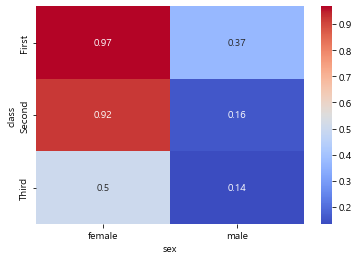

In [17]:
sns.heatmap(df_pivot, annot=True, cmap='coolwarm')
plt.show()

`heatmap()` 함수를 통해 히트맵을 나타낼 수 있으며, annot은 데이터의 값을 표시할 지 여부를 의미한다. 또한 cmap은 팔레트 종류로써 coolwarm은 값이 높을 수록 붉은색, 낮을 수록 푸른색을 표현한다. class가 높을 수록 생존율이 높고, 남성에 비해 여성의 생존율이 높다는 것을 한 눈에 확인할 수 있다.

### 한 번에 여러개의 그래프 나타내기

seaborn 패키지 역시 한번에 여러개의 그래프를 나타내는 것이 가능하지만, 표현 방법에 따라 사용하는 함수가 다르다. seaborn 패키지의 함수들은 크게 'figure-level'과 'axes-level' 함수로 나누어져 있다. 

- figure-level: matplotlib와 별개로 seaborn의 figure를 만들어 그곳에 그래프를 나타낸다. 따라서 figure-level 함수를 사용할 경우 facetgrid(seaborn의 figure)를 통해 레이아웃을 변경하고, 여러개의 그래프를 나타낼 수 있다.
- axes-level: matplotlib의 axes에 그래프를 나타낸다.

아래 그림에서 위에 큰 박스 세 개(replot, displot, catplot)가 figure-level 함수이며, 각각 아래에 있는 작은 박스들이 axes-level 함수다.

```{figure} image/plot/seaborn.png
---
name: seaborn
---
seaborn 패키지의 함수 차이
```

먼저 figure-level의 예제로 class 별 나이의 분포를 나타내보자.

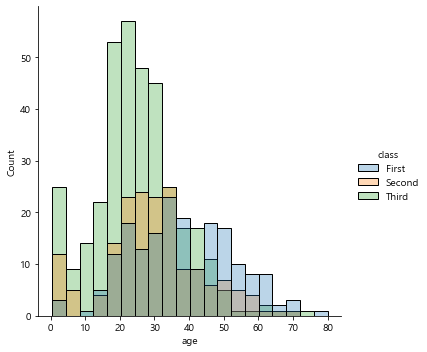

In [18]:
sns.displot(data=df, x='age', hue='class', kind='hist', alpha=0.3)
plt.show()

figure-level 함수에 해당하는 `displot()` 함수를 통해 분포를 나타내는 그래프를 그릴 수 있으며, 그래프 종류에 해당하는 kind에 'hist'를 입력하면 히스토그램을 나타낸다. hue 인자를 통해 'class' 별로 색을 구분했으며, alpha 인자를 통해 투명도를 조절할 수 있다.

이번에는 하나의 그래프에 모든 데이터를 표현하는 것이 아닌 class 별로 각각 개별 그래프로 표현해보도록 하자.

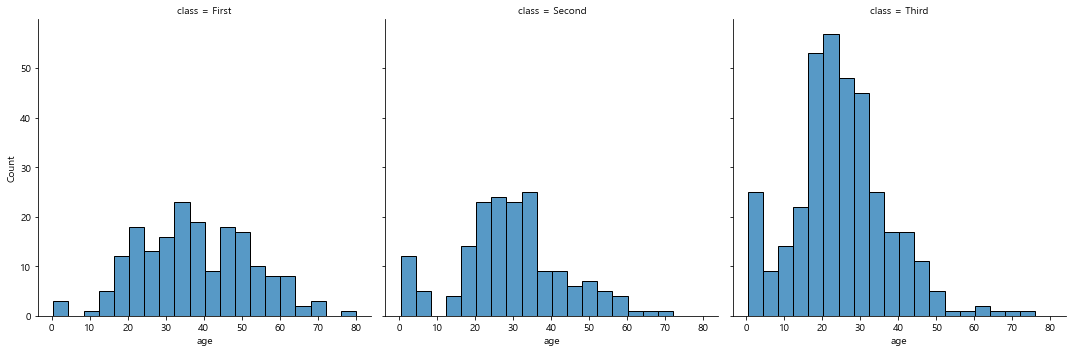

In [19]:
sns.displot(data=df, x='age', col='class', kind='hist')
plt.show()

col 인자에 특정 열을 입력하면 해당 열을 기준으로 그래프가 열 방향으로 각각 분할되어 표현되며, 이는 화면을 분할하는 facetgrid 가 적용되었기 때문이다. 세로 뿐만 아니라 가로로도 그래프를 분할할 수 있다.

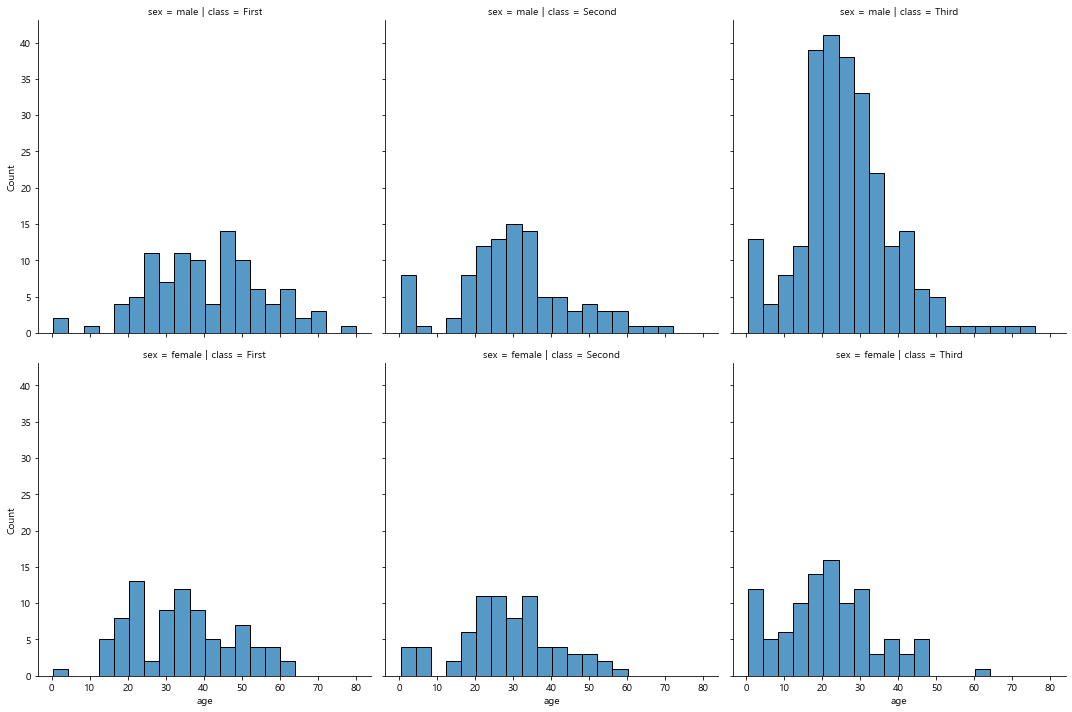

In [20]:
sns.displot(data=df, x='age', col='class', row='sex', kind='hist')
plt.show()

행으로는 sex, 열로는 class 별로 구분이 되었다. 즉, 위의 행은 sex = male, 아래 행은 sex = female에 해당하는 데이터이며, 첫번째 열은 class = First, 두번째 열은 class = Second, 세번째 열은 class = Third에 해당한다. 

만일 히스토그램을 나타내는 `histplot()` 함수를 통해 그래프를 분할하면 어떻게 될까?

In [ ]:
sns.histplot(data=df, x='age', col='class', row='sex')

```{figure} image/plot/seaborn_error.png
---
name: seaborn_error
---
```

위의 코드를 실행하면 오류가 발생한다. 즉, axes-level 함수인 `histplot()`로는 facetgrid를 할 수 없기 때문이다. 

이번에는 axes-level로 그래프를 표현하는 방법에 대해 알아보자. 이는 기존에 살펴본 matplotlib 패키지를 이용하는 방법과 거의 비슷하다.

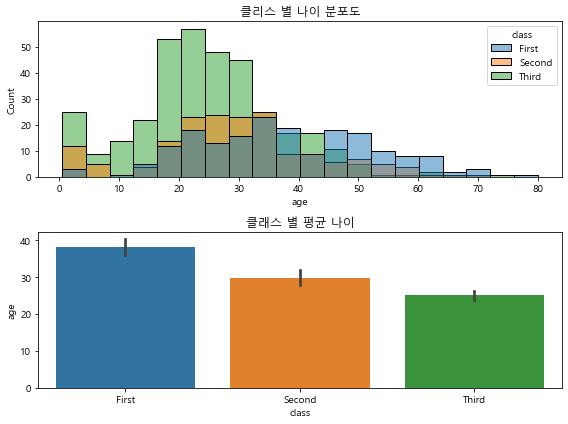

In [21]:
plt.rc('font', family='Malgun Gothic')

g, axes = plt.subplots(2, 1, figsize=(8, 6))

sns.histplot(data=df, x='age', hue='class', ax=axes[0])
sns.barplot(data=df, x='class', y='age', ax=axes[1])

axes[0].set_title('클리스 별 나이 분포도')
axes[1].set_title('클래스 별 평균 나이')

g.tight_layout()
plt.show()

1. 한글 폰트를 지정한다.
2. `subplots()` 함수를 통해 2개의 axes를 생성한다.
3. `histplot()` 함수를 통해 히스토그램을 그린 후, `ax=axes[0]`을 입력하면 첫번째 axes에 해당 그래프가 출력된다.
4. `barplot()` 함수를 통해 막대그래프를 그린후, `ax=axes[1]`을 입력하면 두번째 axes에 해당 그래프가 출력된다.
5. `axes[0]`과 `axes[1]`을 통해 axes의 레이블이나 제목 등을 변경할 수 있다.
6. `tight_layout()` 함수를 입력하면 여백이 조정된다.
7. 그래프를 출력한다.

seaborn 패키지에 대한 자세한 설명은 아래 페이지에 나와있다.

```
https://seaborn.pydata.org/index.html
```